# Project Objective  

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals In order to understand the reasons of the Heart-attack, a data was collected from vanous hospitals across US which is given in US Heart Patients csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.


## Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
print("no.of rows:" , df.shape[0] , "\n""no. of columns:" , df.shape[1])

no.of rows: 4240 
no. of columns: 16


In [5]:
df = df.rename(columns = {'TenYearCHD' : 'Heart_Att'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  Heart_Att        4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
for column in df.columns:
        print(column.upper() ,' : ' , df[column].nunique())
        print()
        print(df[column].value_counts())
        print()

MALE  :  2

male
0    2420
1    1820
Name: count, dtype: int64

AGE  :  39

age
40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
49    132
54    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: count, dtype: int64

EDUCATION  :  4

education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64

CURRENTSMOKER  :  2

currentSmoker
0    2145
1    2095
Name: count, dtype: int64

CIGSPERDAY  :  33

cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.

In [8]:
cat = ["male" , "education", "currentSmoker" , "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

In [9]:
for i in cat:
    df[i] = df[i].astype("object")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  Heart_Att        4240 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [11]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_Att']


In [12]:
round(df[num].describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.01,11.92,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.70,44.59,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.35,22.03,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.88,12.03,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.96,23.95,40.00,71.00,78.0,87.00,394.0
Heart_Att,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [13]:
round(df[cat].describe(), 2).T

,count,unique,top,freq
male,4240.0,2.0,0.0,2420.0
education,4135.0,4.0,1.0,1720.0
currentSmoker,4240.0,2.0,0.0,2145.0
BPMeds,4187.0,2.0,0.0,4063.0
prevalentStroke,4240.0,2.0,0.0,4215.0
prevalentHyp,4240.0,2.0,0.0,2923.0
diabetes,4240.0,2.0,0.0,4131.0


## Handling Duplication

In [14]:
df.duplicated().sum()

np.int64(0)

## Null Value Analysis and Treatment

In [15]:
round(df.isna().sum() * 100/ df.shape[0] , 2).sort_values()

male               0.00
age                0.00
currentSmoker      0.00
prevalentHyp       0.00
prevalentStroke    0.00
diaBP              0.00
sysBP              0.00
diabetes           0.00
Heart_Att          0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.15
dtype: float64

In [16]:
df.male.isna().sum()

np.int64(0)

### Null Value Imputation - Categorical

In [17]:
for column in ["male" , "education", "currentSmoker" , "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]:
    df[column].fillna(df[column].mode()[0] , inplace = True)

In [18]:
df[cat].isna().sum()

male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

### Null Value Imputation - Numerical

In [19]:
df_mean1 = df.copy()
df_median = df.copy()

#### Null Value Replaced by Mean

In [20]:
for column in df_mean1.columns:
    if df_mean1[column].dtype != 'object' :
         mean = df_mean1[column].mean()
         df_mean1[column] = df_mean1[column].fillna(mean)

In [21]:
df_mean1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_Att          0
dtype: int64

#### Null Value Replaced by Median

In [22]:
for column in df_median.columns:
    if df_median[column].dtype != 'object' :
         median = df_median[column].median()
         df_median[column] = df_median[column].fillna(median)

In [23]:
df_median.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_Att          0
dtype: int64

#### Null Value Replaced by KNN

In [24]:
df_knn = df.copy()

In [75]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed , columns = df_knn.columns)

In [76]:
df_knn

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


Text(0.5, 1.0, 'Systolic_BP Boxplot')

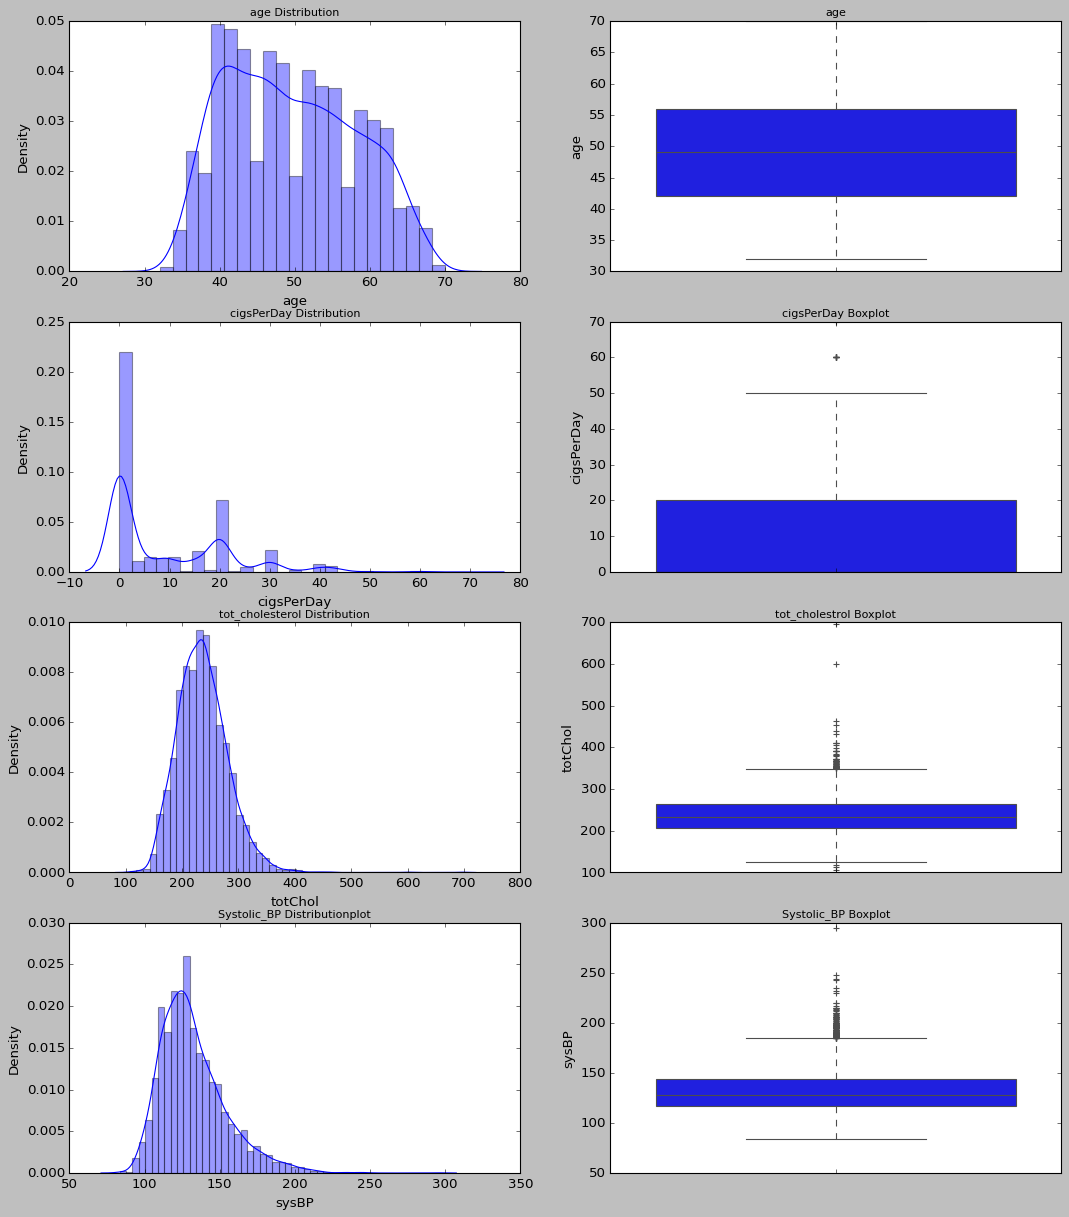

In [77]:
fig , axes = plt.subplots(nrows = 4 , ncols = 2, figsize = (16,18))

a = sns.distplot(df['age'], ax = axes[0][0])
a.set_title("age Distribution", fontsize = 10)

a = sns.boxplot(df['age'], orient = "v", ax = axes[0][1])
a.set_title("age", fontsize = 10)

a = sns.distplot(df['cigsPerDay'], ax = axes [1][0])
a.set_title("cigsPerDay Distribution", fontsize = 10)

a = sns.boxplot(df['cigsPerDay'], orient = "v", ax = axes[1][1])
a.set_title("cigsPerDay Boxplot", fontsize = 10)

a =  sns.distplot(df['totChol'], ax = axes[2][0])
a.set_title("tot_cholesterol Distribution", fontsize = 10)

a = sns.boxplot(df['totChol'], orient = "v", ax = axes[2][1])
a.set_title("tot_cholestrol Boxplot" , fontsize = 10)

a = sns.distplot(df['sysBP'] , ax = axes[3][0])
a.set_title("Systolic_BP Distributionplot" , fontsize = 10)

a = sns.boxplot(df['sysBP'] , orient = "v" , ax = axes[3][1])
a.set_title("Systolic_BP Boxplot" , fontsize = 10)

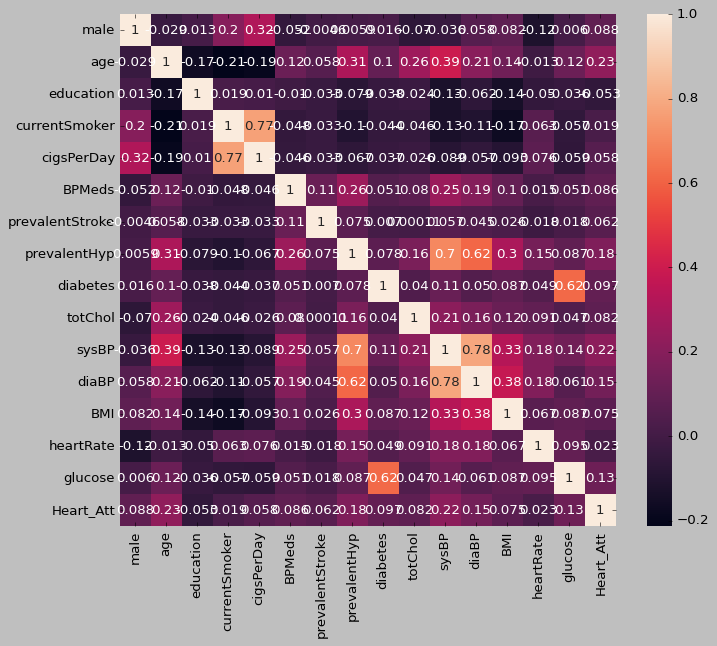

In [78]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [79]:
df_knn.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_Att          0
dtype: int64

### Mean Data

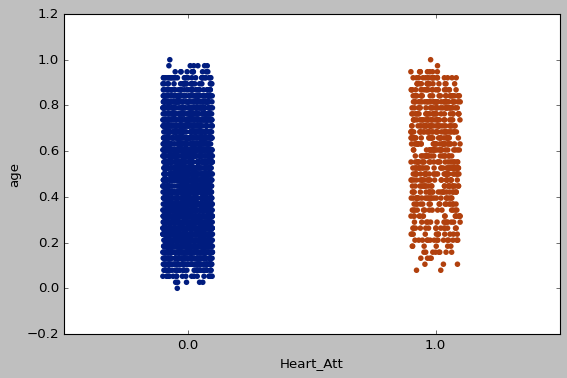

In [80]:
plt.figure(figsize = (8,5))
sns.stripplot(x = df_mean1["Heart_Att"],y =  df_mean1["age"] , jitter = True , palette = "dark")
plt.show()

In [81]:
df_mean1['cigsPerDay'] = pd.to_numeric(df_mean1['cigsPerDay'], errors = 'coerce')

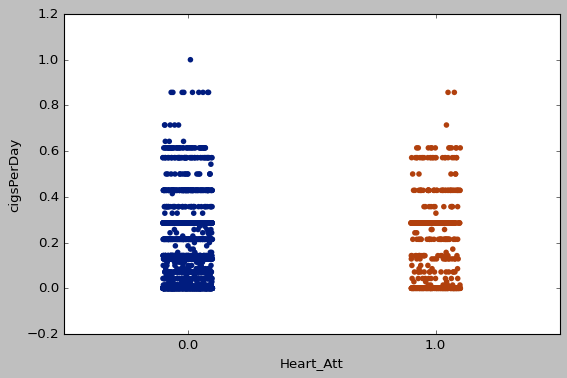

In [82]:
plt.figure(figsize = (8,5))
sns.stripplot(x = df_mean1["Heart_Att"],y =  df_mean1["cigsPerDay"] , jitter = True , palette = "dark")
plt.show()

In [83]:
df_mean1['totChol'] = pd.to_numeric(df_mean1['totChol'], errors = 'coerce')

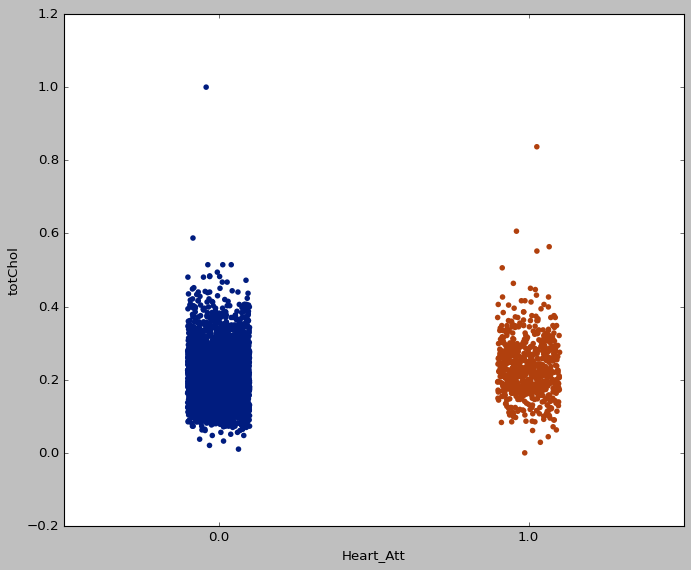

In [84]:
plt.figure(figsize = (10,8))
sns.stripplot(x ="Heart_Att", y = "totChol",data = df_mean1, jitter = True , palette = "dark")
plt.show()

##### Correlation Plot

In [85]:
df_mean1 = df_mean1.apply(pd.to_numeric , errors = 'coerce')

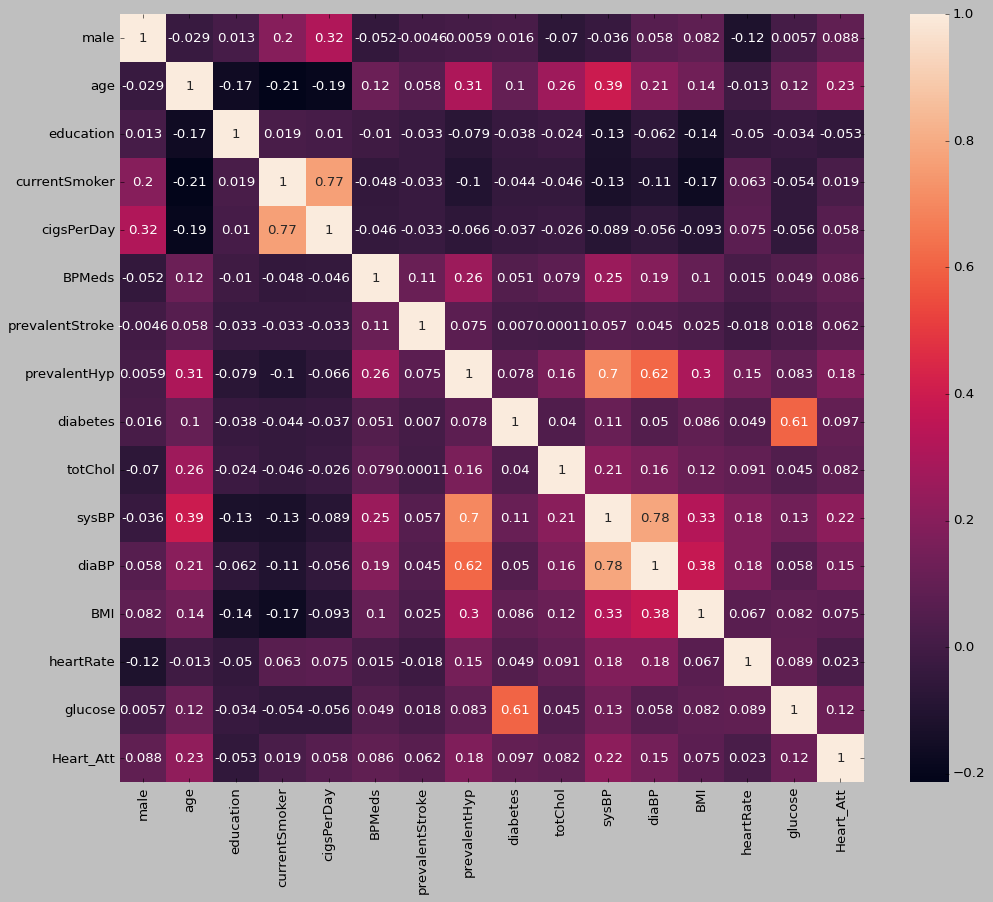

In [86]:

plt.figure(figsize = (15,12))
sns.heatmap(df_mean1.corr() , annot = True)
plt.show()

### Outlier Treatment

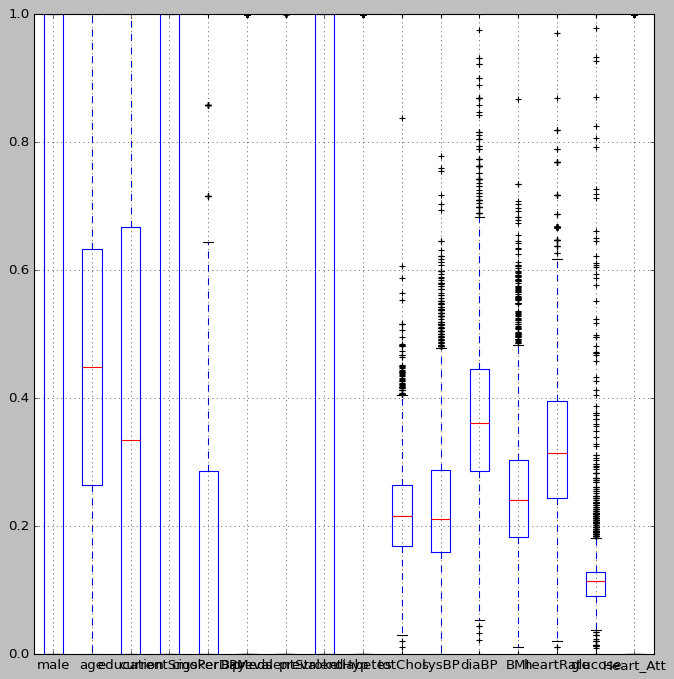

In [87]:
plt.figure(figsize = (10,10))
df_mean1.boxplot()
plt.show()

In [88]:
df_mean_o = df_mean1.copy()

In [89]:
def remove_outlier(column):
    
    sorted(column)
    
    Q1,Q3=np.percentile(column,[25,75])
    
    IQR = Q3-Q1
    
    lower_range= Q1-(1.5 * IQR)
    
    upper_range= Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [90]:
for column in df_mean_o.drop('glucose' , axis = 1).columns:
    
    lr,ur=remove_outlier(df_mean_o[column])
    
    
    df_mean_o[column]=np.where(df_mean_o[column]>ur,ur,df_mean_o[column])
    
    
    df_mean_o[column]=np.where(df_mean_o[column]<lr,lr,df_mean_o[column])

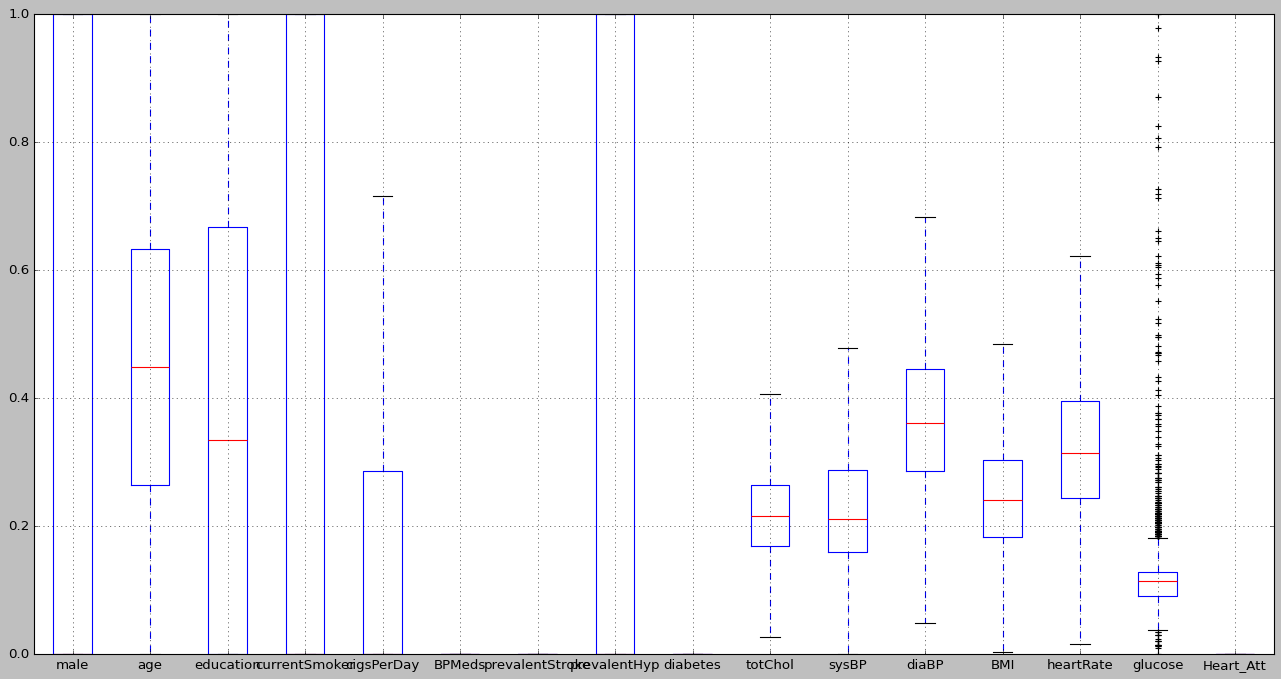

In [91]:
plt.figure(figsize = (20,10))
df_mean_o.boxplot()
plt.show()

 ## Scaling

### Min-Max Scaling

In [92]:
df_mean_o = df_mean_o.apply(lambda x :(x-x.min())/ (x.max() - x.min()))

In [93]:
df_mean_o

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_Att
0,1.0,0.184211,1.000000,0.0,0.00,NaN,NaN,0.0,NaN,0.325893,0.222772,0.291667,0.571393,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.0,0.00,NaN,NaN,0.0,NaN,0.571429,0.371287,0.475000,0.660192,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,1.0,0.40,NaN,NaN,0.0,NaN,0.549107,0.435644,0.458333,0.489152,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,1.0,0.60,NaN,NaN,1.0,NaN,0.459821,0.658416,0.708333,0.652624,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,1.0,0.46,NaN,NaN,0.0,NaN,0.727679,0.460396,0.525000,0.376135,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,1.0,0.40,NaN,NaN,0.0,NaN,0.562500,0.470297,0.325000,0.320636,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,1.0,0.30,NaN,NaN,0.0,NaN,0.392857,0.425743,0.575000,0.177346,0.675000,0.118541,NaN
4237,0.0,0.526316,0.333333,0.0,0.00,NaN,NaN,0.0,NaN,0.656250,0.495050,0.508333,0.293895,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.0,0.00,NaN,NaN,1.0,NaN,0.281250,0.569307,0.758333,0.502270,0.358333,0.090395,NaN


In [94]:
df_mean1 = df_mean1.apply(lambda x :(x-x.min())/ (x.max() - x.min()))

In [95]:
df_mean1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_Att
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,1.0,0.285714,0.0,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,0.000000,1.0,0.214286,0.0,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118541,0.0
4237,0.0,0.526316,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.275042,0.236407,0.370370,0.143723,0.363636,0.189266,0.0
4238,1.0,0.210526,0.666667,0.0,0.000000,0.0,0.0,1.0,0.0,0.132428,0.271868,0.529101,0.243820,0.232323,0.090395,0.0


### Standard Scaler

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_mean_o = pd.DataFrame(scaler.fit_transform(df_mean_o),columns = df_mean_o.columns)
df_mean_o

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_Att
0,1.153113,-1.234283,2.007862,-0.988276,-0.763278,NaN,NaN,-0.671241,NaN,-0.974188,-1.255579,-1.117476,0.331119,0.365642,-2.174271e-01,NaN
1,-0.867217,-0.417664,0.044002,-0.988276,-0.763278,NaN,NaN,-0.671241,NaN,0.326246,-0.528850,-0.152853,0.795808,1.656420,-2.612309e-01,NaN
2,1.153113,-0.184345,-0.937929,1.011863,0.937567,NaN,NaN,-0.671241,NaN,0.208025,-0.213934,-0.240546,-0.099247,-0.064618,-5.240539e-01,NaN
3,-0.867217,1.332233,1.025932,1.011863,1.787990,NaN,NaN,1.489778,NaN,-0.264860,0.876160,1.074850,0.756204,-0.925136,9.214724e-01,NaN
4,-0.867217,-0.417664,1.025932,1.011863,1.192694,NaN,NaN,-0.671241,NaN,1.153796,-0.092812,0.110226,-0.690669,0.795901,1.330035e-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,-0.867217,-0.184345,0.044002,1.011863,0.937567,NaN,NaN,-0.671241,NaN,0.278958,-0.044364,-0.942090,-0.981100,0.709849,1.768073e-01,NaN
4236,-0.867217,-0.650984,-0.937929,1.011863,0.512356,NaN,NaN,-0.671241,NaN,-0.619524,-0.262382,0.373306,-1.730940,0.881953,-2.151967e-16,NaN
4237,-0.867217,0.282295,0.044002,-0.988276,-0.763278,NaN,NaN,-0.671241,NaN,0.775487,0.076758,0.022533,-1.121035,0.365642,1.096688e+00,NaN
4238,1.153113,-1.117623,1.025932,-0.988276,-0.763278,NaN,NaN,1.489778,NaN,-1.210631,0.440123,1.337929,-0.030599,-0.753033,-4.364462e-01,NaN


## Model Building On Mean Data

In [97]:
X = df_mean1.drop('Heart_Att' , axis = 1)
y = df_mean1['Heart_Att']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25, random_state = 1)

### Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [99]:
NB_model = GaussianNB()
NB_model.fit(X_train , y_train)

GaussianNB()

In [100]:
y_train_pred = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print()
print(metrics.confusion_matrix(y_train, y_train_pred))
print()
print(metrics.classification_report(y_train, y_train_pred))

0.8226415094339623

[[2515  183]
 [ 381  101]]

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2698
         1.0       0.36      0.21      0.26       482

    accuracy                           0.82      3180
   macro avg       0.61      0.57      0.58      3180
weighted avg       0.79      0.82      0.80      3180



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

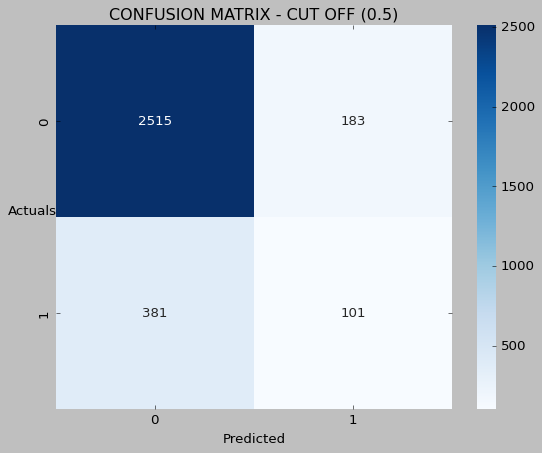

In [101]:
sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [102]:
print(metrics.classification_report(y_train_pred , y_train))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      2896
         1.0       0.21      0.36      0.26       284

    accuracy                           0.82      3180
   macro avg       0.57      0.61      0.58      3180
weighted avg       0.87      0.82      0.84      3180



In [103]:
y_test_pred = NB_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

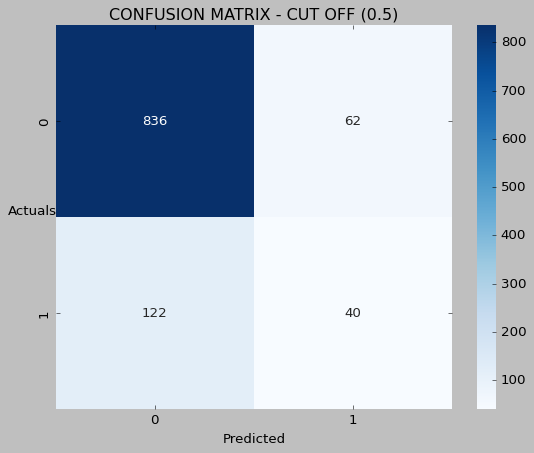

In [104]:
sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [105]:
print(metrics.classification_report(y_test_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       958
         1.0       0.25      0.39      0.30       102

    accuracy                           0.83      1060
   macro avg       0.59      0.63      0.60      1060
weighted avg       0.87      0.83      0.84      1060



## Decision Tree

In [106]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [107]:
y_train_pred = DT_model.predict(X_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

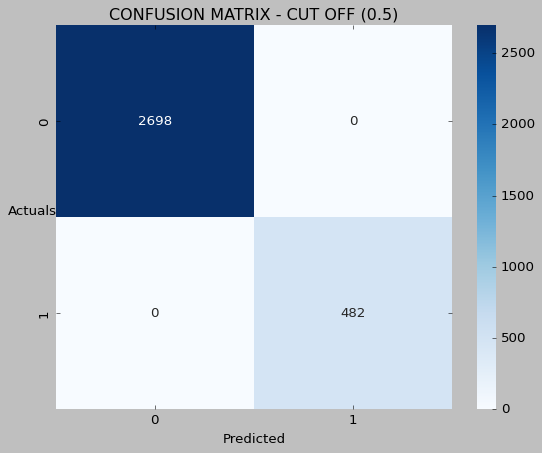

In [108]:
sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [109]:
print(metrics.classification_report(y_train_pred , y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2698
         1.0       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       905
         1.0       0.25      0.26      0.25       155

    accuracy                           0.78      1060
   macro avg       0.56      0.56      0.56      1060
weighted avg       0.78      0.78      0.78      1060



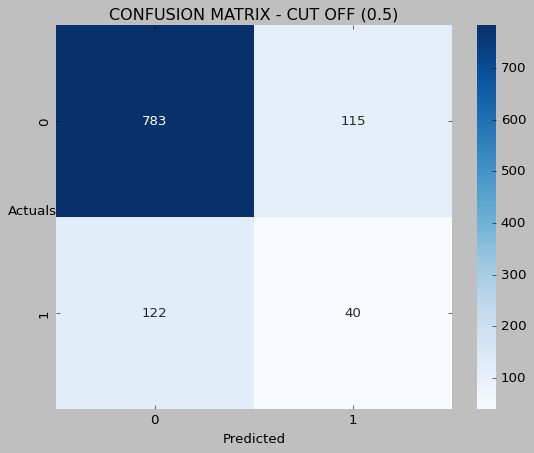

In [110]:
y_test_pred = DT_model.predict(X_test)
sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')


print(metrics.classification_report(y_test_pred , y_test))

# Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100, random_state = 1)
RF_model.fit(X_train , y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2698
         1.0       1.00      1.00      1.00       482

    accuracy                           1.00      3180
   macro avg       1.00      1.00      1.00      3180
weighted avg       1.00      1.00      1.00      3180



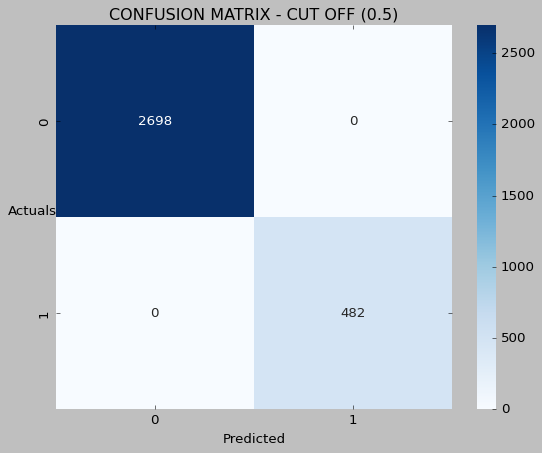

In [112]:
#Train Data Performance
y_train_pred = RF_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train))


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1038
         1.0       0.07      0.50      0.12        22

    accuracy                           0.85      1060
   macro avg       0.53      0.68      0.52      1060
weighted avg       0.97      0.85      0.90      1060



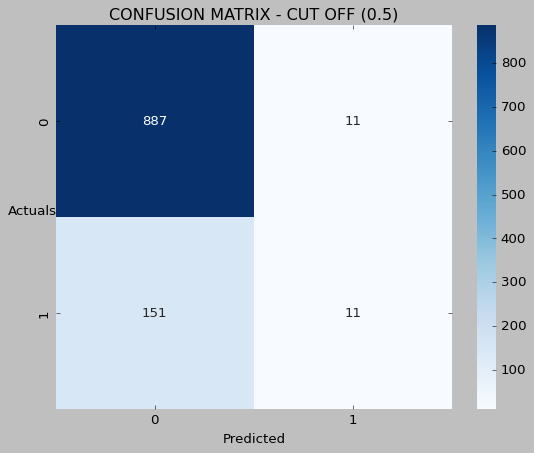

In [113]:
#Test Data Performance
y_test_pred = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_pred , y_test))

# Ada Boost

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators = 100 , random_state = 1)
ADB_model.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      3125
         1.0       0.08      0.67      0.14        55

    accuracy                           0.85      3180
   macro avg       0.54      0.77      0.53      3180
weighted avg       0.98      0.85      0.91      3180



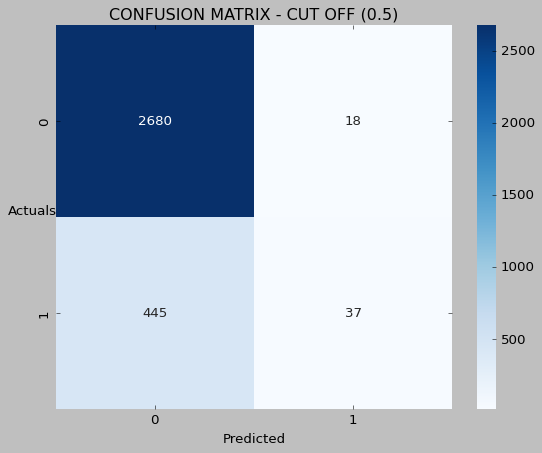

In [115]:
#Train Data Performance
y_train_pred = ADB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train))


              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1047
         1.0       0.04      0.54      0.08        13

    accuracy                           0.85      1060
   macro avg       0.52      0.70      0.50      1060
weighted avg       0.98      0.85      0.91      1060



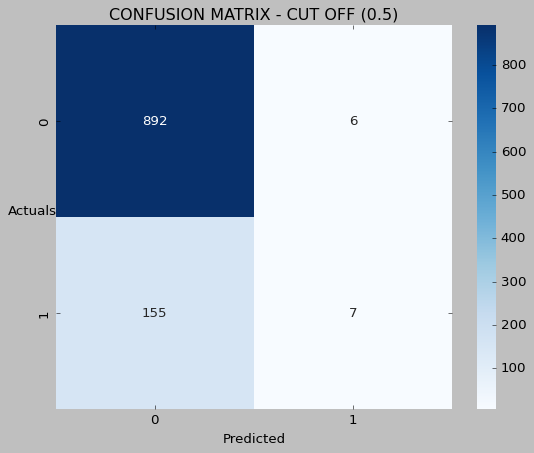

In [116]:
#Test Data Performance
y_test_pred = ADB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_pred , y_test))

# Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      3125
         1.0       0.08      0.67      0.14        55

    accuracy                           0.85      3180
   macro avg       0.54      0.77      0.53      3180
weighted avg       0.98      0.85      0.91      3180



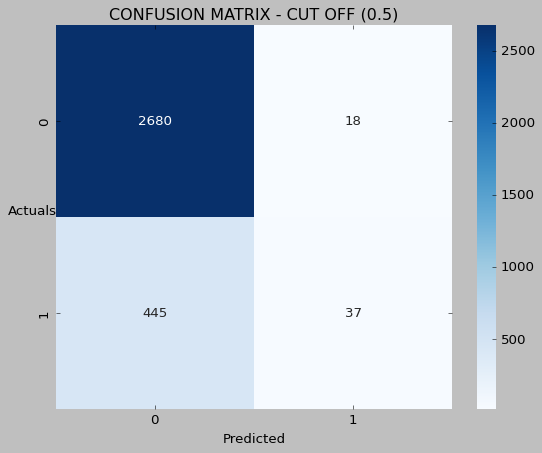

In [118]:
#Train Data Performance
y_test_pred = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      1035
         1.0       0.07      0.44      0.12        25

    accuracy                           0.84      1060
   macro avg       0.53      0.65      0.52      1060
weighted avg       0.96      0.84      0.90      1060



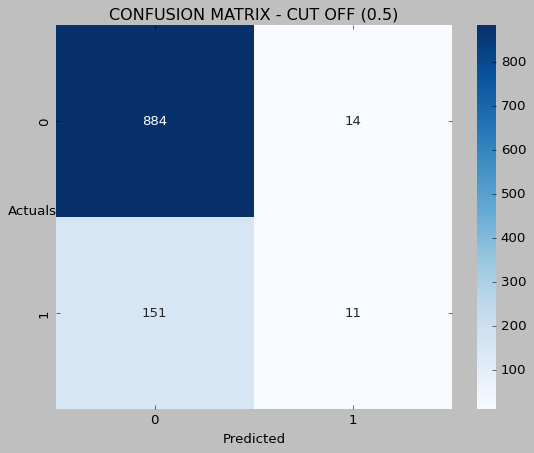

In [119]:
#Test Data Performance
y_test_pred = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_pred , y_test))

# KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train , y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      3125
         1.0       0.08      0.67      0.14        55

    accuracy                           0.85      3180
   macro avg       0.54      0.77      0.53      3180
weighted avg       0.98      0.85      0.91      3180



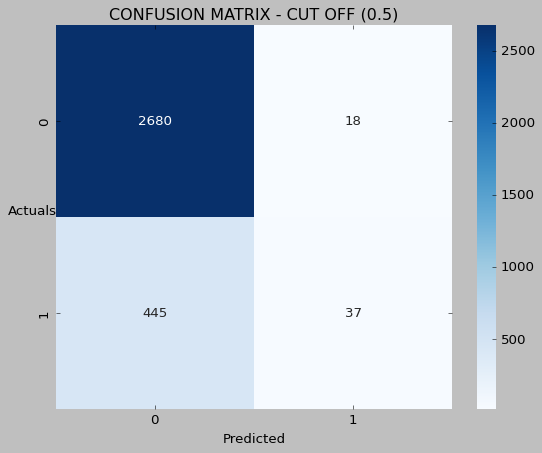

In [121]:
#Train Data Performance
y_test_pred = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      1012
         1.0       0.09      0.29      0.13        48

    accuracy                           0.83      1060
   macro avg       0.52      0.57      0.52      1060
weighted avg       0.92      0.83      0.87      1060



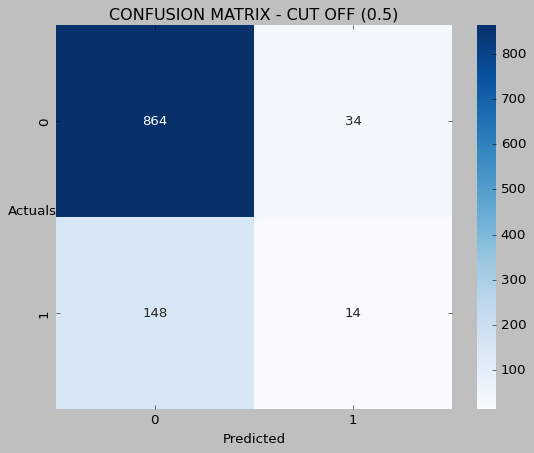

In [122]:
#Test Data Performance
y_test_pred = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_pred , y_test))

# Grid Search

In [123]:
 #Random Forest Example
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,8 ,9,10],
    'max_features' :[11,12,13,14,15],
    'min_samples_leaf' :[20,25,30,35,40],
    'min_samples_split' :[60,65,70,75],
    'n_estimators' : [100,200, 300]
}

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid , cv = 3)

In [74]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#Train Data Performance
y_test_pred = grid_search.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train))

# SMOTE

In [124]:
df_mean1['Heart_Att'].value_counts()

Heart_Att
0.0    3596
1.0     644
Name: count, dtype: int64

In [125]:
df_mean1['Heart_Att'].value_counts()*100/df_mean1.shape[0]

Heart_Att
0.0    84.811321
1.0    15.188679
Name: count, dtype: float64

In [126]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_resample(X_train , y_train.ravel())

In [129]:
X_train.shape

(3180, 15)

In [130]:
X_train_s.shape

(5396, 15)

In [131]:
KNN_model_s = KNeighborsClassifier()
KNN_model_s.fit(X_train_s , y_train_s)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85      2055
         1.0       0.99      0.80      0.88      3341

    accuracy                           0.87      5396
   macro avg       0.87      0.89      0.87      5396
weighted avg       0.90      0.87      0.87      5396



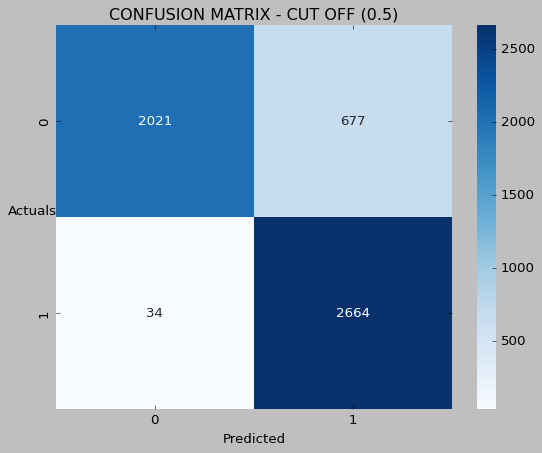

In [132]:
#Train Data Performance
y_train_pred = KNN_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s , y_train_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_pred , y_train_s))

              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74       650
         1.0       0.53      0.21      0.30       410

    accuracy                           0.62      1060
   macro avg       0.59      0.55      0.52      1060
weighted avg       0.60      0.62      0.57      1060



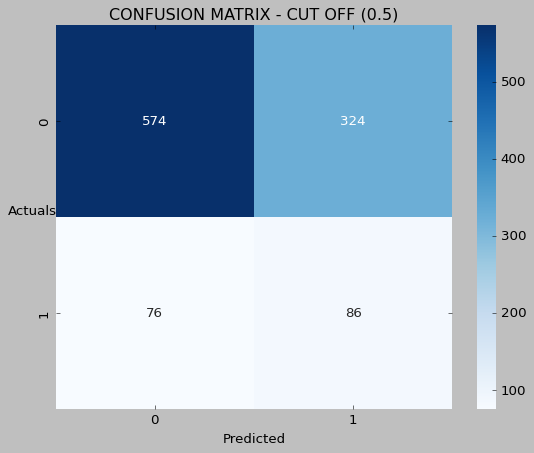

In [133]:
#Test Data Performance
y_test_pred = KNN_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test , y_test_pred)) , annot = True , fmt = '.5g' , cmap = 'Blues');

plt.xlabel('Predicted');            
plt.ylabel('Actuals' , rotation = 0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_pred , y_test))

In [134]:
def get_metrics_score(model , flag = True):
    '''
    model :classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_train, y_train)

    train_recall = metrics.recall_score(y_train , pred_train)
    test_recall =  metrics.recall_score(y_test , pred_test)   

    train_precision = metrics.precision_score(y_train , pred_train)
    test_precision = metrics.precision_score(y_test , pred_test) 

    score_list.extend((train_acc , test_acc ,train_recall , test_recall , train_precision , test_precision))

    # If the flag is set to True then only the following print statements will be displayed.
    if flag == True:
        print("Accuracy on training set: " ,model.score(X_train, y_train) )
        print("Accuracy on test set: " ,model.score(X_test, y_test) )
        print("Recall on training set :" , metrics.recall_score(X_train, y_train))
        print("Recall on test set :" , metrics.recall_score(X_test, y_test))
        print("Precision on training set : " ,metrics.precision_score(y_train , pred_train) )
        print("Precision on test set : " ,metrics.precision_score(y_test , pred_test))

    return score_list #returning the list with trian and test scores

In [135]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model, KNN_model_s]



#defining empty Lists to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# Looping through GLL the models to get the accuracy, precall and precision scores

for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

In [136]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_m', 'ADB_model_m', 'GB_model_m', 'KNN_model_m','RF_model_m', 'NB_model_m', 'KNN_model_s_m'],
                                           'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                                           'Train_Recall': recall_train, 'Test Recall' :recall_test, 
                                           'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test Recall,Train_Precision,Test_Precision
0,DT_model_m,1.00,1.00,1.00,0.25,1.00,0.26
1,ADB_model_m,0.85,0.85,0.08,0.04,0.67,0.54
2,GB_model_m,0.88,0.88,0.23,0.07,0.98,0.44
3,KNN_model_m,0.87,0.87,0.22,0.09,0.71,0.29
4,RF_model_m,0.82,0.82,0.21,0.25,0.36,0.39
5,NB_model_m,1.00,1.00,1.00,0.07,1.00,0.50
6,KNN_model_s_m,0.78,0.78,0.97,0.53,0.41,0.21


# KNN

In [137]:
df_knn = df.copy()

In [138]:
df_knn_o = df_knn.copy()

In [139]:
df_knn_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  Heart_Att        4240 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 530.1+ KB


In [140]:
for column in ["male" , "education", "currentSmoker" , "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]:
    df_knn[column].fillna(df_knn[column].mode()[0] , inplace = True)
    df_knn_o[column].fillna(df_knn_o[column].mode()[0] , inplace = True)

In [141]:
imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed , columns = df_knn.columns)

In [142]:
df_knn.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_Att          0
dtype: int64

In [143]:
imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df_knn_o)
df_knn_o = pd.DataFrame(data = df_imputed , columns = df_knn_o.columns)

In [144]:
df_knn_o.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_Att          0
dtype: int64

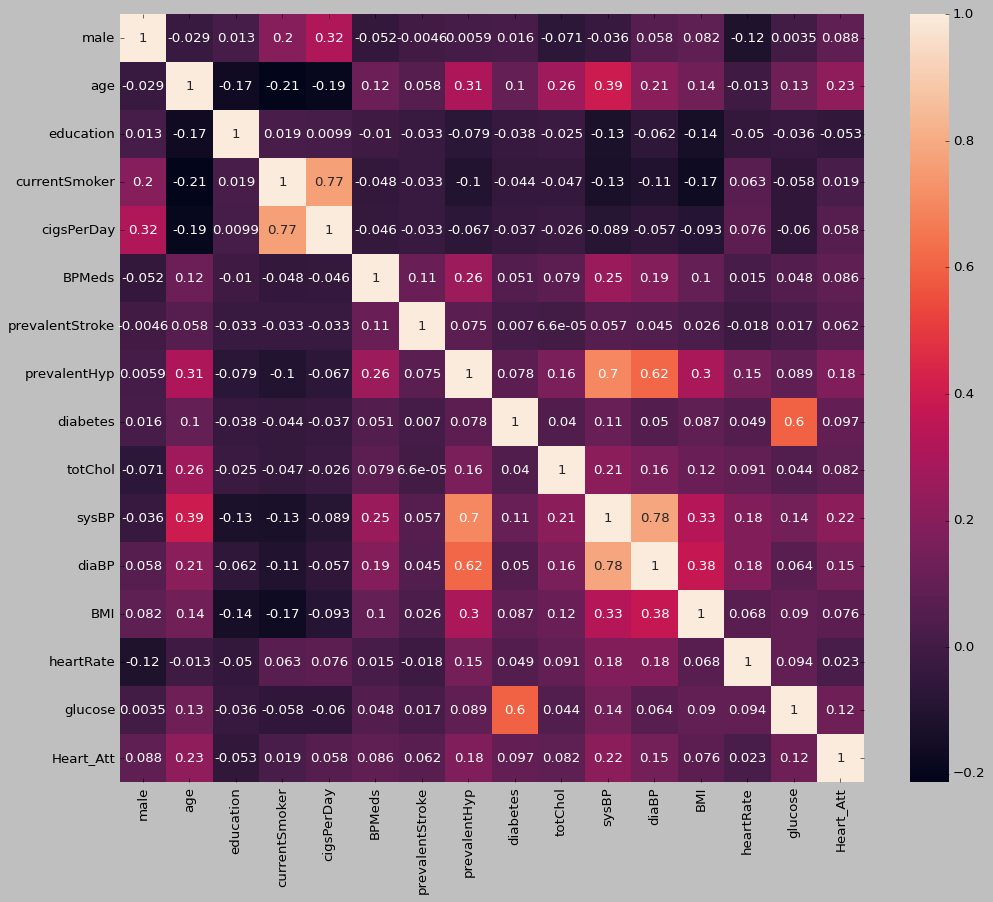

In [145]:
plt.figure(figsize = (15,12))
sns.heatmap(df_knn_o.corr(), annot = True)
plt.show()

In [146]:
df_knn.drop(['diaBP', 'prevalentHyp', 'currentSmoker'] , axis = 1 , inplace = True)

In [147]:
df_knn

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,Heart_Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,76.8,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,185.0,141.0,25.60,67.0,72.0,0.0


In [148]:
df_knn2 = df_knn[['age', 'cigsPerDay' , 'totChol' , 'sysBP' , 'BMI' , 'heartRate' , 'glucose' ,'Heart_Att']].apply(lambda x :(x-x.min())/ (x.max() - x.min())) 

In [149]:
df_knn2['male'] = df_knn['male']
df_knn2['education'] = df_knn['education']
df_knn2['BPMeds'] = df_knn['BPMeds']
df_knn2['prevalentStroke'] = df_knn['prevalentStroke']
df_knn2['diabetes'] = df_knn['diabetes']

In [150]:
df_knn2

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,Heart_Att,male,education,BPMeds,prevalentStroke,diabetes
0,0.184211,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,0.0,1.0,4.0,0.0,0.0,0.0
1,0.368421,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0.0,0.0,2.0,0.0,0.0,0.0
2,0.421053,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,0.0,1.0,1.0,0.0,0.0,0.0
3,0.763158,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,1.0,0.0,3.0,0.0,0.0,0.0
4,0.368421,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.421053,0.285714,0.239389,0.224586,0.156568,0.404040,0.129944,0.0,0.0,2.0,0.0,0.0,0.0
4236,0.315789,0.214286,0.174873,0.203310,0.087736,0.424242,0.103955,0.0,0.0,1.0,0.0,0.0,0.0
4237,0.526316,0.000000,0.275042,0.236407,0.143723,0.363636,0.189266,0.0,0.0,2.0,0.0,0.0,0.0
4238,0.210526,0.000000,0.132428,0.271868,0.243820,0.232323,0.090395,0.0,1.0,3.0,0.0,0.0,0.0


In [197]:
X = df_knn2.drop('Heart_Att' , axis = 1)
y = df_knn2['Heart_Att']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3, random_state = 1)

In [198]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [199]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [200]:
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [201]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [202]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [203]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [204]:
sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [205]:
X_train_s.shape

(5022, 12)

In [206]:
ADB_model_s = AdaBoostClassifier()
ADB_model_s.fit(X_train_s, y_train_s)

AdaBoostClassifier()

In [207]:
GB_model_s = GradientBoostingClassifier()
GB_model_s.fit(X_train_s, y_train_s)

GradientBoostingClassifier()

In [208]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model, ADB_model_s,GB_model_s]



#defining empty Lists to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# Looping through GLL the models to get the accuracy, precall and precision scores

for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

In [209]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_knn', 'ADB_model_knn', 'GB_model_knn', 'KNN_model_knn','RF_model_knn', 'NB_model_knn', 'ADB_model_s_knn', 'GB_model_s_knn'],
                                           'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                                           'Train_Recall': recall_train, 'Test Recall' :recall_test, 
                                           'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test Recall,Train_Precision,Test_Precision
0,DT_model_knn,1.00,1.00,1.00,0.27,1.00,0.24
1,ADB_model_knn,0.85,0.85,0.07,0.04,0.70,0.54
2,GB_model_knn,0.88,0.88,0.23,0.09,0.95,0.44
3,KNN_model_knn,0.87,0.87,0.22,0.04,0.74,0.18
4,RF_model_knn,0.83,0.83,0.16,0.18,0.37,0.37
5,NB_model_knn,1.00,1.00,1.00,0.05,1.00,0.53
6,ADB_model_s_knn,0.66,0.66,0.64,0.63,0.26,0.25
7,GB_model_s_knn,0.79,0.79,0.61,0.40,0.38,0.24


In [164]:
df_knn_o

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [165]:
for column in df_knn_o.drop(['glucose','Heart_Att'] , axis = 1).columns:
    
    lr,ur=remove_outlier(df_knn_o[column])
    
    
    df_knn_o[column]=np.where(df_knn_o[column]>ur,ur,df_knn_o[column])
    
    
    df_knn_o[column]=np.where(df_knn_o[column]<lr,lr,df_knn_o[column])

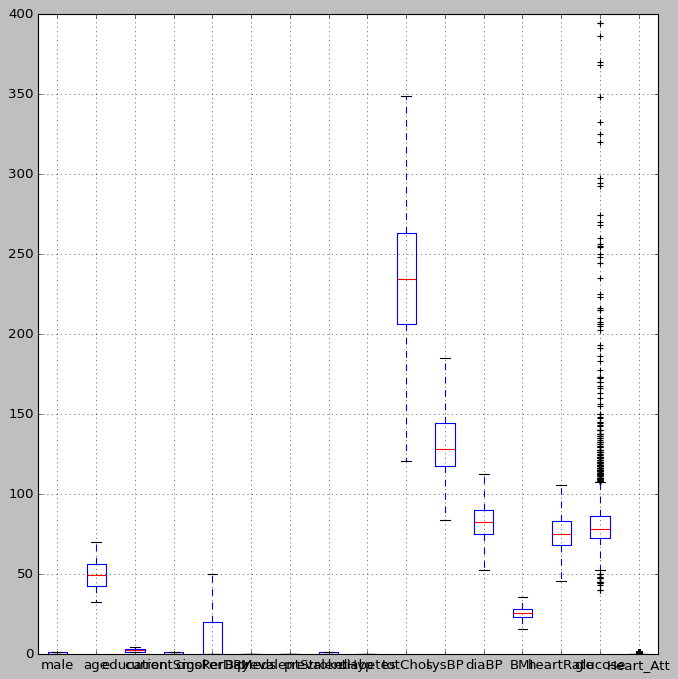

In [166]:
plt.figure(figsize = (10,10))
df_knn_o.boxplot()
plt.show()

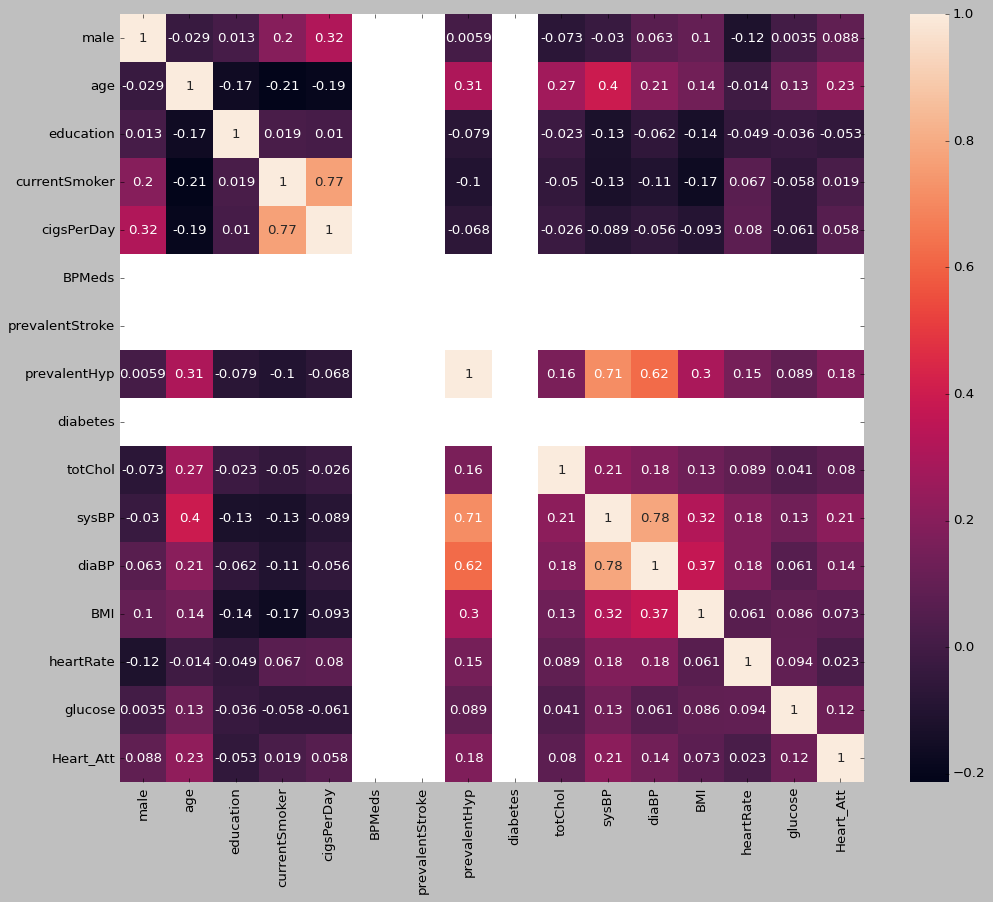

In [167]:
plt.figure(figsize = (15,12))
sns.heatmap(df_knn_o.corr(), annot = True)
plt.show()

In [185]:
X = df_knn_o.drop('Heart_Att' , axis = 1)
y = df_knn_o['Heart_Att']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3, random_state = 1)

In [186]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [188]:
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [189]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [190]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [191]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [193]:
ADB_model_s = AdaBoostClassifier()
ADB_model_s.fit(X_train_s, y_train_s)

AdaBoostClassifier()

In [194]:
GB_model_s = GradientBoostingClassifier()
GB_model_s.fit(X_train_s, y_train_s)

GradientBoostingClassifier()

In [195]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model, ADB_model_s,GB_model_s]



#defining empty Lists to add train and test results

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# Looping through GLL the models to get the accuracy, precall and precision scores

for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4], 2))
    precision_test.append(np.round(j[5], 2))

In [210]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_knn_o', 'ADB_model_knn_o', 'GB_model_knn_o', 'KNN_model_knn_o','RF_model_knn_o', 'NB_model_knn_o', 'ADB_model_s_knn_o', 'GB_model_s_knn_o'],
                                           'Train_Accuracy': acc_train, 'Test_Accuracy': acc_test,
                                           'Train_Recall': recall_train, 'Test Recall' :recall_test, 
                                           'Train_Precision': precision_train, 'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test Recall,Train_Precision,Test_Precision
0,DT_model_knn_o,1.00,1.00,1.00,0.27,1.00,0.24
1,ADB_model_knn_o,0.85,0.85,0.07,0.04,0.70,0.54
2,GB_model_knn_o,0.88,0.88,0.23,0.09,0.95,0.44
3,KNN_model_knn_o,0.87,0.87,0.22,0.04,0.74,0.18
4,RF_model_knn_o,0.83,0.83,0.16,0.18,0.37,0.37
5,NB_model_knn_o,1.00,1.00,1.00,0.05,1.00,0.53
6,ADB_model_s_knn_o,0.66,0.66,0.64,0.63,0.26,0.25
7,GB_model_s_knn_o,0.79,0.79,0.61,0.40,0.38,0.24


In [211]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()